In [19]:
from zss import simple_distance, Node
import json
import pandas as pd
import matplotlib.pyplot as plt

A = (
    Node("f")
        .addkid(Node("a")
            .addkid(Node("h"))
            .addkid(Node("c")
                .addkid(Node("l"))))
        .addkid(Node("e"))
    )
B = (
    Node("f")
        .addkid(Node("a")
            .addkid(Node("d"))
            .addkid(Node("c")
                .addkid(Node("b"))))
        .addkid(Node("e"))
    )
print(type(A))
assert simple_distance(A, B) == 2

<class 'zss.simple_tree.Node'>


In [2]:
def load_json_in_dict(path):
    ''' 
    Loads ordered dictionnary of bounds per pages and per coordinates from a json file
    :param string path: where all data of libretto is stored, as explained above
    '''
    with open(path) as json_file: 
        return json.load(json_file)

In [5]:
def create_tree(libretto, gt = False):
    # Load data
    data = ""
    if gt:
        data = load_json_in_dict("./data/"+libretto+"/3_Network/network_truth.json")
    else:
        data = load_json_in_dict("./data/"+libretto+"/3_Network/network.json")
    # Create links
    tree = Node(libretto)
    for act in data.keys():
        node_act = Node(act)
        for scene in data[act].keys():
            node_scene = Node(scene)
            for char in data[act][scene].keys():
                for i in range(data[act][scene][char]):
                    node_scene.addkid(Node(char))
            node_act.addkid(node_scene)
        tree.addkid(node_act)
    return (tree)

In [26]:
gt_tree = create_tree("Gli", gt = True)
predicted_tree = create_tree("Gli", gt = False)
simple_distance(gt_tree, predicted_tree)

258.0

In [12]:
def create_subtree(act, scene, data):
    node_scene = Node(scene)
    for char in data[act][scene].keys():
        for i in range(data[act][scene][char]):
            node_scene.addkid(Node(char))
    return node_scene

In [13]:
def distance_scenes(libretto, act, scene):
    # Load data
    data_gt = load_json_in_dict("./data/"+libretto+"/3_Network/network_truth.json")
    data_predict = load_json_in_dict("./data/"+libretto+"/3_Network/network.json")
        
    # Create links
    node_scene_gt = create_subtree(act, scene, data_gt)
    node_scene_predict = create_subtree(act, scene, data_predict)
    
    dist = simple_distance(node_scene_gt, node_scene_predict) 
    return dist

In [14]:
def plot_distances(libretto, data_gt, data_predict): 
    dist_act = list()
    for act in data_gt.keys():
        if (act in data_predict.keys()):
            dist_scene = list()
            for scene in data_gt[act].keys():
                if (scene in data_predict[act].keys()):
                   # print(data_predict[act].keys())
                    dist_scene.append(distance_scenes(libretto, act, scene))
            dist_act.append(dist_scene)
    return dist_act

In [23]:
# Load data
libretto = "Gli"
data_gt = load_json_in_dict("./data/"+libretto+"/3_Network/network_truth.json")
data_predict = load_json_in_dict("./data/"+libretto+"/3_Network/network.json")

dist = plot_distances(libretto, data_gt, data_predict)

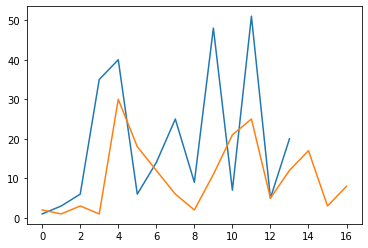

In [25]:
plt.plot(dist[0])
plt.plot(dist[1])